In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [8]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/14NW65RhvhiM4l7Vs9giB_V3gPEyMFunCmzV4SBv0kPs/export?format=csv&gid=1387110363")

In [9]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [10]:
df.shape

(3282, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [12]:
df['Amount'] = df['Amount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Amount'] = df['Amount'].astype('float')

In [13]:
df.describe()

,Amount,Boxes Shipped
count,3282.000000,3282.000000
mean,6030.338775,164.666971
std,4393.980200,124.024736
min,7.000000,1.000000
25%,2521.495000,71.000000
50%,5225.500000,137.000000
75%,8556.842500,232.000000
max,26170.950000,778.000000


In [14]:
df = df.drop(columns = ['Date'])

In [15]:
df.isna().sum()

,0
Sales Person,0
Country,0
Product,0
Amount,0
Boxes Shipped,0


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df['Class'] = np.where((df['Amount'] > 7500), 1, 0)
# df[(df['Amount'] > 7500) & (df['Boxes Shipped'] > 130)].shape

In [18]:
df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Class
0,Jehu Rudeforth,UK,Mint Chip Choco,5320.0,180,0
1,Van Tuxwell,India,85% Dark Bars,7896.0,94,1
2,Gigi Bohling,India,Peanut Butter Cubes,4501.0,91,0
3,Jan Morforth,Australia,Peanut Butter Cubes,12726.0,342,1
4,Jehu Rudeforth,UK,Peanut Butter Cubes,13685.0,184,1


In [19]:
for i in df.columns:
  print(i, df[i].value_counts(), '\n')

Sales Person Sales Person
Kelci Walkden          162
Brien Boise            159
Van Tuxwell            153
Beverie Moffet         150
Oby Sorrel             147
Dennison Crosswaite    147
Ches Bonnell           144
Gigi Bohling           141
Karlen McCaffrey       141
Curtice Advani         138
Madelene Upcott        135
Kaine Padly            135
Marney O'Breen         135
Jehu Rudeforth         129
Roddy Speechley        129
Gunar Cockshoot        129
Barr Faughny           129
Mallorie Waber         123
Jan Morforth           117
Andria Kimpton         117
Husein Augar           114
Dotty Strutley         108
Rafaelita Blaksland    102
Wilone O'Kielt         102
Camilla Castle          96
Name: count, dtype: int64 

Country Country
Australia      615
India          552
USA            537
UK             534
Canada         525
New Zealand    519
Name: count, dtype: int64 

Product Product
Eclairs                 180
50% Dark Bites          180
Smooth Sliky Salty      177
White Choc   

In [20]:
df['Class'].value_counts()

,count
Class,
0,2221
1,1061


In [21]:
x = df.drop(['Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [22]:
print(x_train.shape)
print(y_train.shape)

(2625, 5)
(2625,)


In [23]:
print(x_test.shape)
print(y_test.shape)

(657, 5)
(657,)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   3282 non-null   object 
 1   Country        3282 non-null   object 
 2   Product        3282 non-null   object 
 3   Amount         3282 non-null   float64
 4   Boxes Shipped  3282 non-null   int64  
 5   Class          3282 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 154.0+ KB


In [25]:
cat_cols = df.drop(columns = ['Amount', 'Boxes Shipped']).select_dtypes(include='object').columns
num_cols = df.drop(columns = ['Class']).select_dtypes(include='number').columns

preprocess = ColumnTransformer([
    ('num', RobustScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

lr = LogisticRegression(
    class_weight='balanced'
)

rf = RandomForestClassifier(
    class_weight='balanced'
)

dtc = DecisionTreeClassifier(
    class_weight='balanced'
)

model_lr = Pipeline([
    ('preprocess', preprocess),
    ('lr', lr)
])

model_rf = Pipeline([
    ('preprocess', preprocess),
    ('rf', rf)
])

model_dtc = Pipeline([
    ('preprocess', preprocess),
    ('dtc', dtc)
])

In [26]:
ensemble_model = VotingClassifier(
    estimators=[('model1', model_lr), ('model2', model_rf), ('model3', model_dtc)],
    voting='hard'
)

ensemble_model.fit(x_train, y_train)

VotingClassifier(estimators=[('model1',
                              Pipeline(steps=[('preprocess',
                                               ColumnTransformer(transformers=[('num',
                                                                                RobustScaler(),
                                                                                Index(['Amount', 'Boxes Shipped'], dtype='object')),
                                                                               ('cat',
                                                                                OneHotEncoder(handle_unknown='ignore'),
                                                                                Index(['Sales Person', 'Country', 'Product'], dtype='object'))])),
                                              ('lr',
                                               LogisticRegression(class_weight='balanced'))])),
                             ('model2',
                              Pipeli...
                                               RandomForestClassifier(class_weight='balanced'))])),
                             ('model3',
                              Pipeline(steps=[('preprocess',
                                               ColumnTransformer(transformers=[('num',
                                                                                RobustScaler(),
                                                                                Index(['Amount', 'Boxes Shipped'], dtype='object')),
                                                                               ('cat',
                                                                                OneHotEncoder(handle_unknown='ignore'),
                                                                                Index(['Sales Person', 'Country', 'Product'], dtype='object'))])),
                                              ('dtc',
                                               DecisionTreeClassifier(class_weight='balanced'))]))])

In [27]:
y_pred = ensemble_model.predict(x_test)

In [28]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(20)

,Actual,Predicted
3061,0,0
1818,0,0
1636,1,1
3032,0,0
568,1,1
1984,0,0
2492,1,1
1533,0,0
2015,1,1
380,0,0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       460
           1       1.00      1.00      1.00       197

    accuracy                           1.00       657
   macro avg       1.00      1.00      1.00       657
weighted avg       1.00      1.00      1.00       657



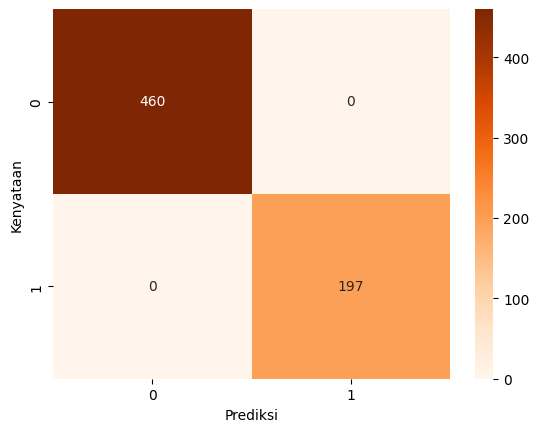

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# 1. Print Laporan Detail (Precision, Recall, F1-Score)
print(classification_report(y_test, y_pred))

# 2. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataan')
plt.show()

In [30]:
_pred = ensemble_model.predict(x)

In [31]:
check = pd.DataFrame({
    'Actual' : y,
    'Predition' : _pred
})
check.head(5)

,Actual,Predition
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1


In [32]:
y_test_shuffled = y_test.sample(frac=1).values

In [33]:
compare = pd.DataFrame({'Actual': y_test_shuffled, 'Predicted': y_pred})
compare.head(5)

,Actual,Predicted
0,0,0
1,1,0
2,0,1
3,0,0
4,0,1


In [34]:
accuracy_score(y_test_shuffled, y_pred)

0.558599695585997

Overfitting Check,<br>if model still give accuracy 100% the model is overfitting / have data lakeage. if model accuracy is close to 50% the model is learning pattern correctly.